# Beginning Machine Learning Examples

### Linear Regression
Import libaries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

Generate random data points 

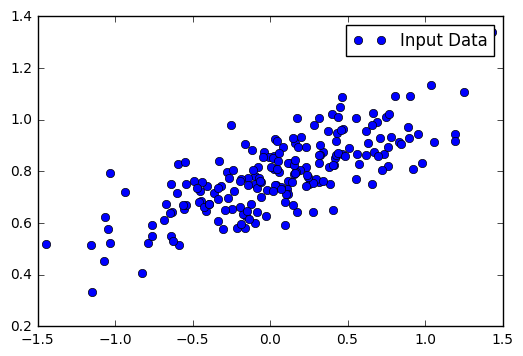

In [10]:
number_of_points = 200
x_point = []
y_point = []
a = 0.22
b = 0.78

for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b + np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])

plt.plot(x_point, y_point, 'o', label='Input Data')
plt.legend()
plt.show()

Cost Function and Gradient Descent

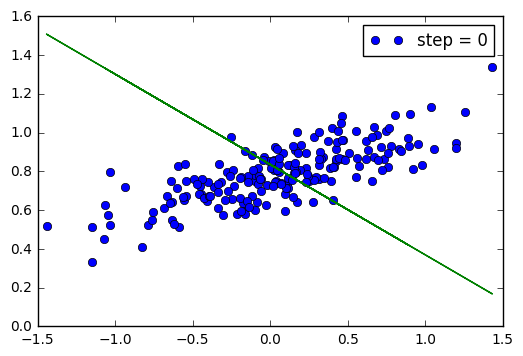

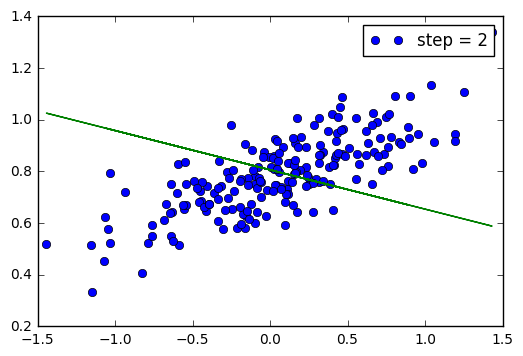

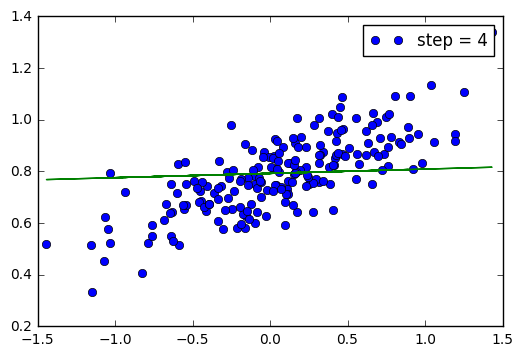

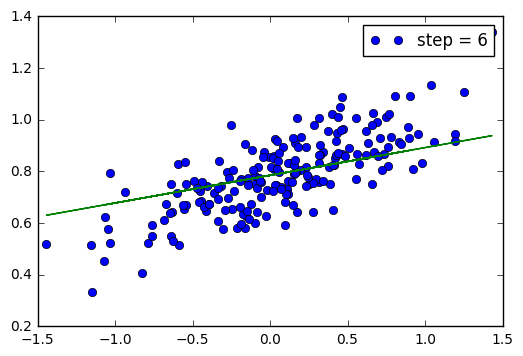

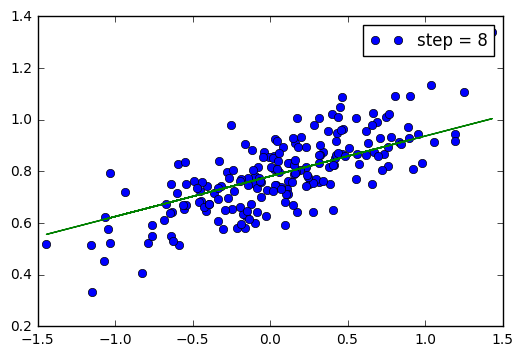

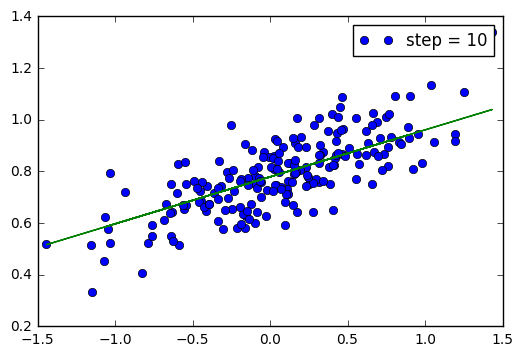

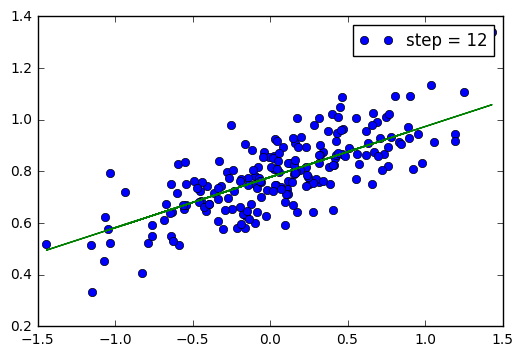

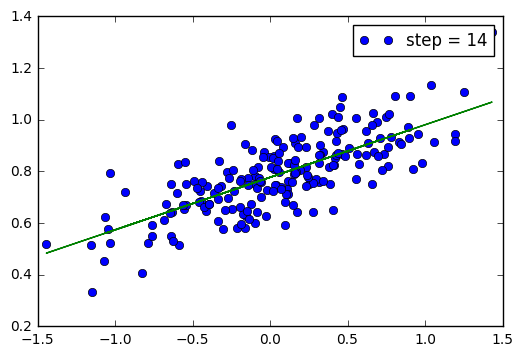

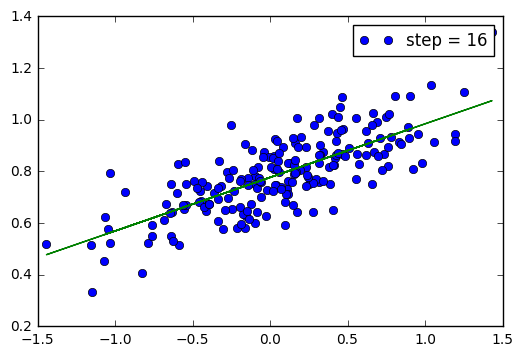

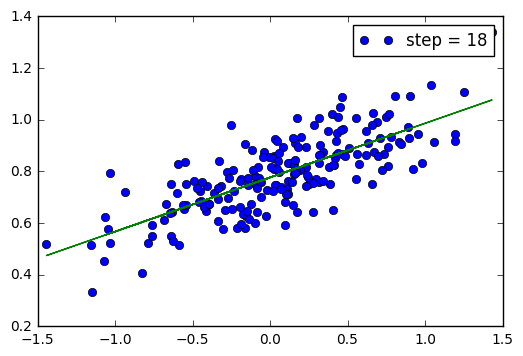

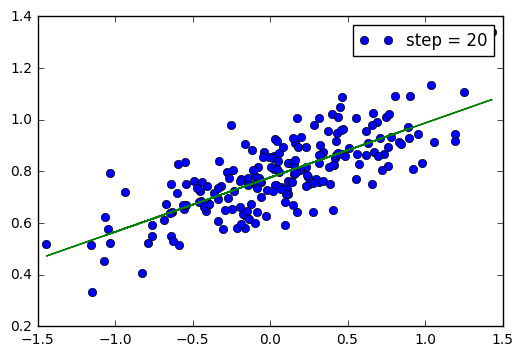

In [16]:
# A is initialized to be random number between -1.0 and 1.0
A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
#B is initialized to be zero
B = tf.Variable(tf.zeros([1]))
# Line function heuristic
y = A * x_point + B

# Mean squared error cost Function to be minimized
cost_function = tf.reduce_mean(tf.square(y - y_point))
# Gradient Descent, parameter is the learning rate
optimizer = tf.train.GradientDescentOptimizer(0.5)
# Define the optimization for each step of simulation
train = optimizer.minimize(cost_function)

# Initialize the variables
model = tf.global_variables_initializer()
# Instantiate the evaluation graph
with tf.Session() as session:
    # calculate the variable values
    session.run(model)
    # run 20 steps
    for step in range(0, 21):
        # execute the optimization step for each iteration
        session.run(train)
        if (step % 2) == 0:
            plt.plot(x_point, y_point, 'o', label='step = {}'.format(step))
            plt.plot(x_point, session.run(A) * x_point + session.run(B))
            plt.legend()
            plt.show()
            

### KNN for images (notMNIST)

To create the notMNIST.pickle file of images, use the notMNIST scripts located in the notMNIST jupyter notebook. Make sure the files are being saved to mounted drive if you are using Docker. 

In [2]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (200000, 28, 28), (200000,))
('Validation set', (10000, 28, 28), (10000,))
('Test set', (10000, 28, 28), (10000,))


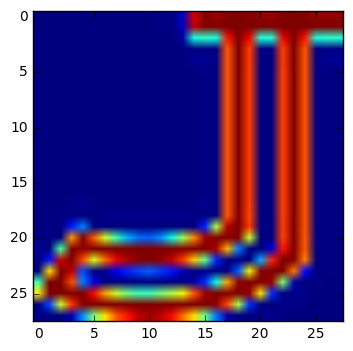

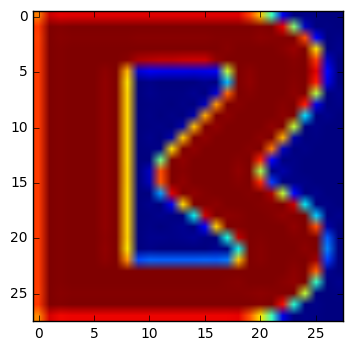

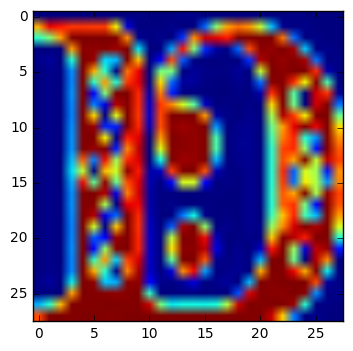

In [6]:
plt.imshow(train_dataset[1])
plt.show()

plt.imshow(valid_dataset[0])
plt.show()

plt.imshow(test_dataset[0])
plt.show()

In [3]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (200000, 784), (200000, 10))
('Validation set', (10000, 784), (10000, 10))
('Test set', (10000, 784), (10000, 10))


In [73]:
train_subset = 200
test_subset = 10000

graph = tf.Graph()
with graph.as_default():
    a = tf.placeholder(tf.float32)
    b = tf.placeholder(tf.float32)

    correct = 0
    # Euclidean distance between two images
    distance = tf.reduce_sum(tf.abs(tf.add(a,tf.neg(b))), 1)
    # Select the lowest distance as the correct prediction
    prediction = tf.arg_min(distance, 0)

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for i in range(0, train_subset+1):
        feed_dict={a: train_dataset[i], b:test_dataset[0:test_subset]}
        pred, dist = session.run([prediction, distance], feed_dict=feed_dict)
        
        if (test_labels[pred] == train_labels[i]).all():
            correct += 1
        
        if (i % 10 == 0 and i != 0):
            print "The accuracy for {} training examples is {}".format(
                i, correct / float(train_subset))
        
            

Initialized
The accuracy for 10 training examples is 0.045
The accuracy for 20 training examples is 0.085
The accuracy for 30 training examples is 0.12
The accuracy for 40 training examples is 0.16
The accuracy for 50 training examples is 0.21
The accuracy for 60 training examples is 0.245
The accuracy for 70 training examples is 0.295
The accuracy for 80 training examples is 0.34
The accuracy for 90 training examples is 0.385
The accuracy for 100 training examples is 0.425
The accuracy for 110 training examples is 0.47
The accuracy for 120 training examples is 0.51
The accuracy for 130 training examples is 0.55
The accuracy for 140 training examples is 0.59
The accuracy for 150 training examples is 0.64
The accuracy for 160 training examples is 0.685
The accuracy for 170 training examples is 0.725
The accuracy for 180 training examples is 0.77
The accuracy for 190 training examples is 0.805
The accuracy for 200 training examples is 0.845
